In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets,layers,models
import cv2
import PIL

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [2]:
import pathlib
data_dir = pathlib.Path("C://flowers")
data_dir

WindowsPath('C:/flowers')

In [3]:
list(data_dir.glob('*/*.jpg'))[:5]

[WindowsPath('C:/flowers/bougainvillea/bougainvillea_00002.jpg'),
 WindowsPath('C:/flowers/bougainvillea/bougainvillea_00003.jpg'),
 WindowsPath('C:/flowers/bougainvillea/bougainvillea_00004.jpg'),
 WindowsPath('C:/flowers/bougainvillea/bougainvillea_00005.jpg'),
 WindowsPath('C:/flowers/bougainvillea/bougainvillea_00006.jpg')]

In [4]:
count = len(list(data_dir.glob('*/*.jpg')))
count

733

In [5]:
bougainvillea = list(data_dir.glob('bougainvillea/*'))
bougainvillea[:5]

[WindowsPath('C:/flowers/bougainvillea/bougainvillea_00002.jpg'),
 WindowsPath('C:/flowers/bougainvillea/bougainvillea_00003.jpg'),
 WindowsPath('C:/flowers/bougainvillea/bougainvillea_00004.jpg'),
 WindowsPath('C:/flowers/bougainvillea/bougainvillea_00005.jpg'),
 WindowsPath('C:/flowers/bougainvillea/bougainvillea_00006.jpg')]

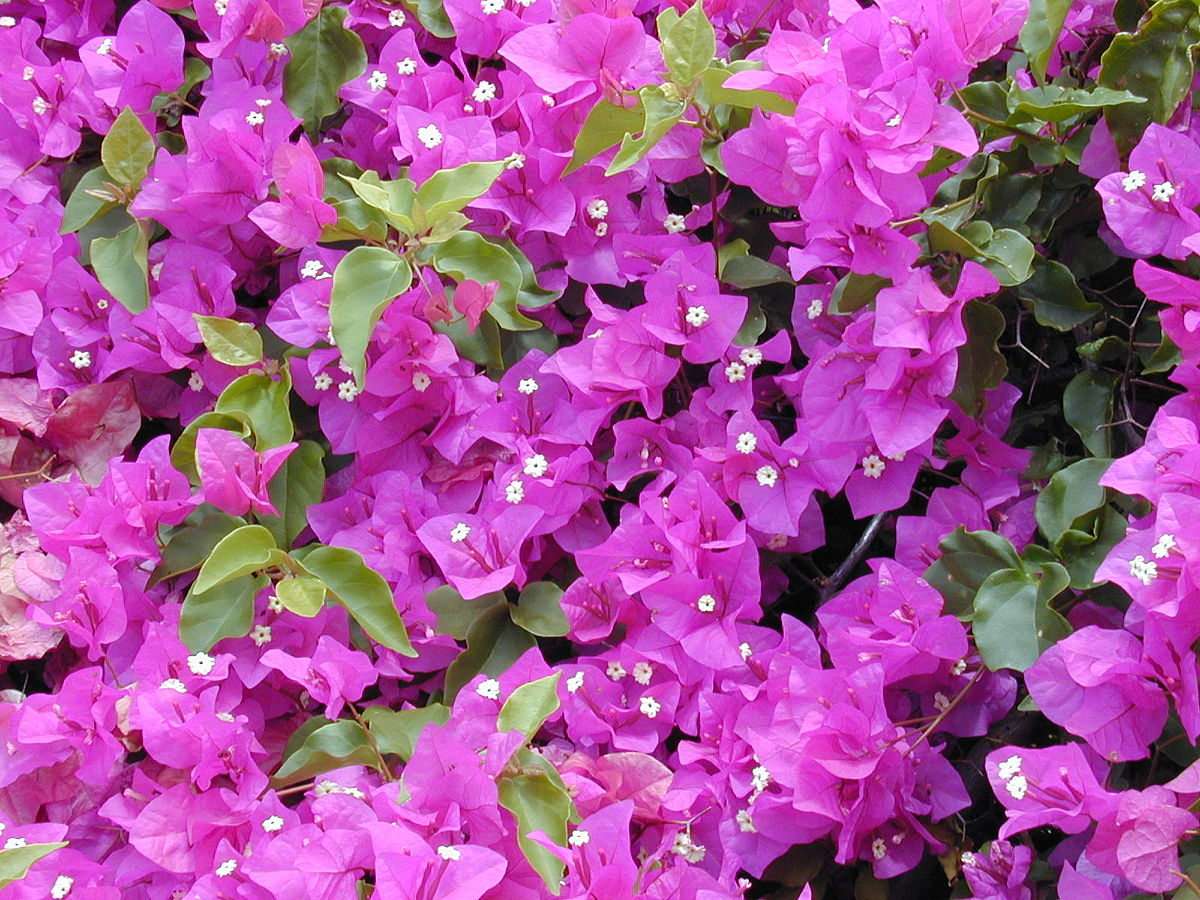

In [6]:
PIL.Image.open(str(bougainvillea[1]))

In [7]:
flowers_image_dict = {
    'bougainvillea' : list(data_dir.glob('bougainvillea/*')),
    'daisies' : list(data_dir.glob('daisies/*')),
    'gardenias' : list(data_dir.glob('gardenias/*')),
    'hibiscus' : list(data_dir.glob('hibiscus/*')),
    'hydrangeas' : list(data_dir.glob('hydrangeas/*')),
    'lilies' : list(data_dir.glob('lilies/*')),
    'orchids' : list(data_dir.glob('orchids/*')),
    'peonies' : list(data_dir.glob('peonies/*')),
    'roses' : list(data_dir.glob('roses/*')),
    'tulip' : list(data_dir.glob('tulip/*')),  
}

In [8]:
flowers_image_dict.keys()

dict_keys(['bougainvillea', 'daisies', 'gardenias', 'hibiscus', 'hydrangeas', 'lilies', 'orchids', 'peonies', 'roses', 'tulip'])

In [9]:
flower_labels_dict = {
    'bougainvillea' : 0, 
    'daisies' : 1, 
    'gardenias' : 2, 
    'hibiscus' : 3, 
    'hydrangeas' : 4, 
    'lilies' : 5, 
    'orchids' : 6, 
    'peonies' : 7, 
    'roses' : 8, 
    'tulip' : 9
}

In [10]:
flowers_image_dict['tulip'][0]

WindowsPath('C:/flowers/tulip/tulip_00002.jpg')

In [11]:
str(flowers_image_dict['tulip'][0])

'C:\\flowers\\tulip\\tulip_00002.jpg'

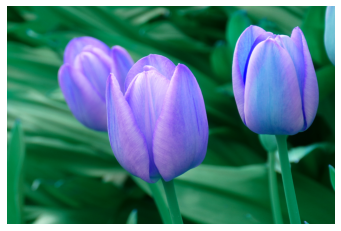

In [12]:
img = cv2.imread(str(flowers_image_dict['tulip'][0]))
plt.axis("off")
plt.imshow(img)

In [13]:
img.shape

(1360, 2048, 3)

In [14]:
resize = cv2.resize(img,(360,360))
resize.shape

(360, 360, 3)

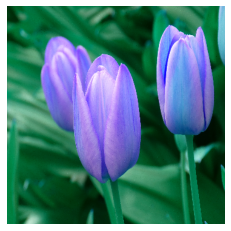

In [15]:
plt.axis("off")
plt.imshow(resize)

In [16]:
flowers_image_dict.items()

dict_items([('bougainvillea', [WindowsPath('C:/flowers/bougainvillea/bougainvillea_00002.jpg'), WindowsPath('C:/flowers/bougainvillea/bougainvillea_00003.jpg'), WindowsPath('C:/flowers/bougainvillea/bougainvillea_00004.jpg'), WindowsPath('C:/flowers/bougainvillea/bougainvillea_00005.jpg'), WindowsPath('C:/flowers/bougainvillea/bougainvillea_00006.jpg'), WindowsPath('C:/flowers/bougainvillea/bougainvillea_00007.jpg'), WindowsPath('C:/flowers/bougainvillea/bougainvillea_00008.jpg'), WindowsPath('C:/flowers/bougainvillea/bougainvillea_00009.jpg'), WindowsPath('C:/flowers/bougainvillea/bougainvillea_00010.jpg'), WindowsPath('C:/flowers/bougainvillea/bougainvillea_00012.jpg'), WindowsPath('C:/flowers/bougainvillea/bougainvillea_00013.jpg'), WindowsPath('C:/flowers/bougainvillea/bougainvillea_00014.jpg'), WindowsPath('C:/flowers/bougainvillea/bougainvillea_00015.jpg'), WindowsPath('C:/flowers/bougainvillea/bougainvillea_00016.jpg'), WindowsPath('C:/flowers/bougainvillea/bougainvillea_00017.j

In [17]:
X , y = [] , []
# roses : 001.jpg
for flower_name, image in flowers_image_dict.items():
    for imgs in image:
        img = cv2.imread(str(imgs))
        resized_img = cv2.resize(img,(360,360))
        X.append(resized_img)
        #flower_name = roses ---> y.append(8)
        y.append(flower_labels_dict[flower_name])


In [18]:
X

[array([[[ 91,  11,  81],
         [101,  11,  88],
         [114,  15, 100],
         ...,
         [152,  83, 152],
         [160,  83, 155],
         [158,  78, 151]],
 
        [[108,  15,  93],
         [115,  14,  98],
         [139,  26, 119],
         ...,
         [141,  66, 138],
         [148,  73, 145],
         [145,  71, 143]],
 
        [[134,  26, 112],
         [128,  16, 105],
         [142,  22, 117],
         ...,
         [126,  56, 126],
         [130,  56, 128],
         [142,  66, 138]],
 
        ...,
 
        [[ 90,  96, 109],
         [ 95,  98, 111],
         [121, 124, 135],
         ...,
         [ 37,  33,  38],
         [ 34,  30,  35],
         [ 31,  27,  32]],
 
        [[ 92, 100, 113],
         [ 93,  99, 110],
         [108, 115, 124],
         ...,
         [ 32,  27,  28],
         [ 33,  28,  30],
         [ 34,  28,  33]],
 
        [[ 79,  89,  99],
         [ 78,  83,  94],
         [105, 112, 121],
         ...,
         [ 59,  54,  55],
  

In [19]:
X = np.array(X)
y = np.array(y)

In [20]:
X

array([[[[ 91,  11,  81],
         [101,  11,  88],
         [114,  15, 100],
         ...,
         [152,  83, 152],
         [160,  83, 155],
         [158,  78, 151]],

        [[108,  15,  93],
         [115,  14,  98],
         [139,  26, 119],
         ...,
         [141,  66, 138],
         [148,  73, 145],
         [145,  71, 143]],

        [[134,  26, 112],
         [128,  16, 105],
         [142,  22, 117],
         ...,
         [126,  56, 126],
         [130,  56, 128],
         [142,  66, 138]],

        ...,

        [[ 90,  96, 109],
         [ 95,  98, 111],
         [121, 124, 135],
         ...,
         [ 37,  33,  38],
         [ 34,  30,  35],
         [ 31,  27,  32]],

        [[ 92, 100, 113],
         [ 93,  99, 110],
         [108, 115, 124],
         ...,
         [ 32,  27,  28],
         [ 33,  28,  30],
         [ 34,  28,  33]],

        [[ 79,  89,  99],
         [ 78,  83,  94],
         [105, 112, 121],
         ...,
         [ 59,  54,  55],
        

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [22]:
X_train.shape , X_test.shape

((586, 360, 360, 3), (147, 360, 360, 3))

In [23]:
y_train.shape , y_test.shape

((586,), (147,))

In [24]:
X_train = X_train / 255
X_test = X_test /255

In [25]:
with tf.device('/GPU:0'):
    cnn = keras.Sequential([
        layers.Conv2D(16,3,padding = 'same',activation = 'relu',input_shape = (360,360,3)),
        layers.MaxPooling2D(),
    
        layers.Conv2D(32,3,padding = 'same',activation = 'relu'),
        layers.MaxPooling2D(),
    
        layers.Conv2D(64,3,padding = 'same',activation = 'relu'),
        layers.MaxPooling2D(),
    
        layers.Flatten(),
        layers.Dense(128,activation='relu'),
        layers.Dense(10,activation = 'sigmoid'),
    ])

    cnn.compile(optimizer = 'adam',loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])
    cnn.fit(X_train,y_train,epochs = 10)
    cnn.evaluate(X_test,y_test)

Epoch 1/10
19/19 [==============================] - 49s 756ms/step - loss: 3.0185 - accuracy: 0.1263
Epoch 2/10
19/19 [==============================] - 12s 626ms/step - loss: 2.1304 - accuracy: 0.2406
Epoch 3/10
19/19 [==============================] - 12s 623ms/step - loss: 1.4932 - accuracy: 0.5000
Epoch 4/10
19/19 [==============================] - 12s 621ms/step - loss: 0.7625 - accuracy: 0.7645
Epoch 5/10
19/19 [==============================] - 12s 628ms/step - loss: 0.3856 - accuracy: 0.8908
Epoch 6/10
19/19 [==============================] - 12s 621ms/step - loss: 0.1626 - accuracy: 0.9625
Epoch 7/10
19/19 [==============================] - 12s 621ms/step - loss: 0.0593 - accuracy: 0.9881
Epoch 8/10
19/19 [==============================] - 12s 626ms/step - loss: 0.0242 - accuracy: 0.9966
Epoch 9/10
19/19 [==============================] - 12s 620ms/step - loss: 0.0255 - accuracy: 0.9949
Epoch 10/10
5/5 [==============================] - 5s 822ms/step - loss: 2.6563 - accuracy:

In [26]:
predict = cnn.predict(X_test)

In [27]:
y_pred = [np.argmax(i) for i in predict]

In [28]:
y_pred[:10]

[2, 1, 5, 0, 6, 4, 6, 5, 0, 0]

In [29]:
y_test[:10]

array([2, 2, 0, 0, 5, 4, 3, 9, 6, 0])

# data augmentation


In [30]:
data_augmentation = keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal",input_shape = (360,360,3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
])

In [31]:
with tf.device('/GPU:0'):
    cnn1 = keras.Sequential([
        data_augmentation,
        layers.Conv2D(16,3,padding = 'same',activation = 'relu',input_shape = (360,360,3)),
        layers.MaxPooling2D(),
    
        layers.Conv2D(32,3,padding = 'same',activation = 'relu'),
        layers.MaxPooling2D(),
    
        layers.Conv2D(64,3,padding = 'same',activation = 'relu'),
        layers.MaxPooling2D(),
        layers.Dropout(0.2),
    
        layers.Flatten(),
        layers.Dense(128,activation='relu'),
        layers.Dense(10,activation = 'sigmoid'),
    ])

    cnn1.compile(optimizer = 'adam',loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])
    cnn1.fit(X_train,y_train,epochs = 30)
    cnn1.evaluate(X_test,y_test)

Epoch 1/30
19/19 [==============================] - 21s 764ms/step - loss: 3.2377 - accuracy: 0.1399
Epoch 2/30
19/19 [==============================] - 14s 759ms/step - loss: 1.9855 - accuracy: 0.2867
Epoch 3/30
19/19 [==============================] - 14s 741ms/step - loss: 1.6911 - accuracy: 0.4164
Epoch 4/30
19/19 [==============================] - 14s 741ms/step - loss: 1.4507 - accuracy: 0.4676
Epoch 5/30
19/19 [==============================] - 14s 744ms/step - loss: 1.2937 - accuracy: 0.5495
Epoch 6/30
19/19 [==============================] - 14s 740ms/step - loss: 1.2801 - accuracy: 0.5461
Epoch 7/30
19/19 [==============================] - 14s 739ms/step - loss: 1.1020 - accuracy: 0.5973
Epoch 8/30
19/19 [==============================] - 14s 745ms/step - loss: 1.1168 - accuracy: 0.6075
Epoch 9/30
19/19 [==============================] - 14s 746ms/step - loss: 0.9778 - accuracy: 0.6621
Epoch 10/30
19/19 [==============================] - 14s 742ms/step - loss: 0.9665 - accura

In [32]:
predict1 = cnn1.predict(X_test)

In [33]:
y_pred1 = [np.argmax(i) for i in predict1]

In [113]:
y_pred1[100]

6

In [114]:
y_test[100]

3

In [103]:
data1 = cv2.imread('./garden_roses_00008.jpg')
resized_img = cv2.resize(data1,(360,360))

In [104]:
resized_img.shape

(360, 360, 3)

In [105]:
resized_img = resized_img.reshape(-1,360,360,3)

In [106]:
resized_img / 255

array([[[[0.61960784, 0.74509804, 0.76470588],
         [0.64705882, 0.77647059, 0.78823529],
         [0.64313725, 0.76862745, 0.76862745],
         ...,
         [0.48235294, 0.46666667, 0.69803922],
         [0.50980392, 0.50196078, 0.73333333],
         [0.52156863, 0.50588235, 0.76078431]],

        [[0.60784314, 0.73333333, 0.75686275],
         [0.65098039, 0.78039216, 0.76862745],
         [0.61176471, 0.74117647, 0.7254902 ],
         ...,
         [0.52941176, 0.50588235, 0.75686275],
         [0.55294118, 0.5254902 , 0.78823529],
         [0.55686275, 0.52156863, 0.79215686]],

        [[0.60784314, 0.72941176, 0.74117647],
         [0.61568627, 0.74509804, 0.72941176],
         [0.59215686, 0.72156863, 0.70588235],
         ...,
         [0.53333333, 0.50196078, 0.77647059],
         [0.55294118, 0.51372549, 0.78823529],
         [0.56078431, 0.51764706, 0.80392157]],

        ...,

        [[0.12156863, 0.42745098, 0.28235294],
         [0.08235294, 0.3372549 , 0.23529412]

In [107]:
t1 = cnn1.predict(resized_img)

In [108]:
resized_img.shape

(1, 360, 360, 3)

TypeError: Invalid shape (1, 360, 360, 3) for image data

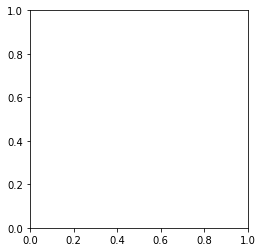

In [109]:
plt.imshow(resized_img)

In [110]:
t1

array([[1., 0., 0., 1., 1., 1., 1., 1., 1., 1.]], dtype=float32)

In [111]:
np.argmax(t1)

0

In [73]:
flower_labels_dict

{'bougainvillea': 0,
 'daisies': 1,
 'gardenias': 2,
 'hibiscus': 3,
 'hydrangeas': 4,
 'lilies': 5,
 'orchids': 6,
 'peonies': 7,
 'roses': 8,
 'tulip': 9}